In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Question 1: Outliers removal and transformation

In [20]:
df = pd.read_csv('diabetes.csv')

In [21]:
# a. What are the kurtosis and skewness values of the Insulin attribute?
kurtosis = df['Insulin'].kurtosis()
skewness = df['Insulin'].skew()
print(f"Kurtosis of Insulin: {kurtosis}")
print(f"Skewness of Insulin: {skewness}")

Kurtosis of Insulin: 7.265911343503076
Skewness of Insulin: 2.268393486537506


In [22]:
# b. Filter the dataframe and select only the rows where Insulin is not equal to 0
df_filtered = df[df['Insulin'] != 0]

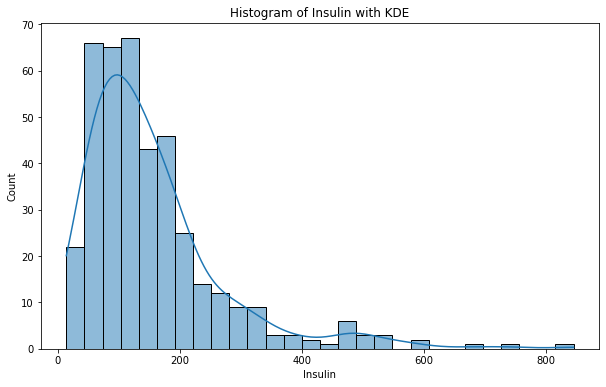

In [23]:
# c. Draw the histogram of Insulin column along with kernel density estimation (KDE) curve
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Insulin'], kde=True)
plt.title('Histogram of Insulin with KDE')
plt.show()

In [24]:
# d. Outliers detection and imputation
df_filtered = df_filtered.copy()
Q1 = df_filtered['Insulin'].quantile(0.25)
Q3 = df_filtered['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_band = Q1 - 1.5 * IQR
upper_band = Q3 + 1.5 * IQR
df_filtered.loc[df_filtered['Insulin'] < lower_band, 'Insulin'] = lower_band
df_filtered.loc[df_filtered['Insulin'] > upper_band, 'Insulin'] = upper_band

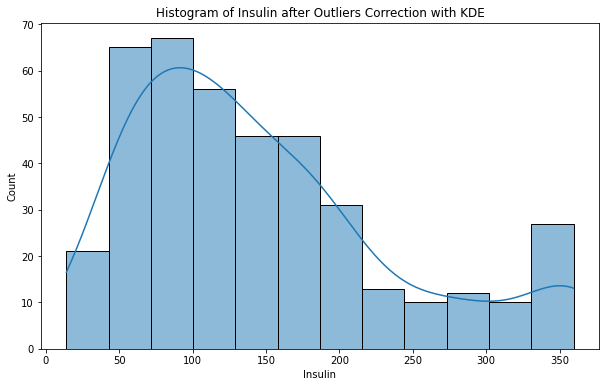

In [25]:
# Draw the histogram again to observe the difference
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Insulin'], kde=True)
plt.title('Histogram of Insulin after Outliers Correction with KDE')
plt.show()

In [26]:
# e. Transform Insulin column using loge (x+1) formula to make the Insulin values follow the normal distribution
df_filtered = df[df['Insulin'] != 0].copy()
df_filtered.loc[:, 'Insulin'] = np.log(df_filtered['Insulin'] + 1)

In [27]:
# f. Find the kurtosis and skewness of Insulin after the transformation
kurtosis_transformed = df_filtered['Insulin'].kurtosis()
skewness_transformed = df_filtered['Insulin'].skew()
print(f"Kurtosis of Transformed Insulin: {kurtosis_transformed}")
print(f"Skewness of Transformed Insulin: {skewness_transformed}")

Kurtosis of Transformed Insulin: 0.28635454895368717
Skewness of Transformed Insulin: -0.09753328135772833


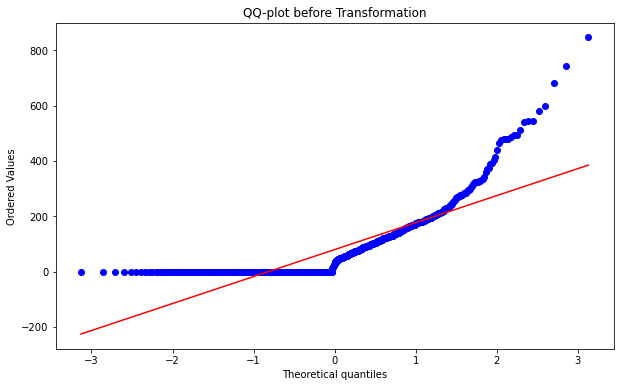

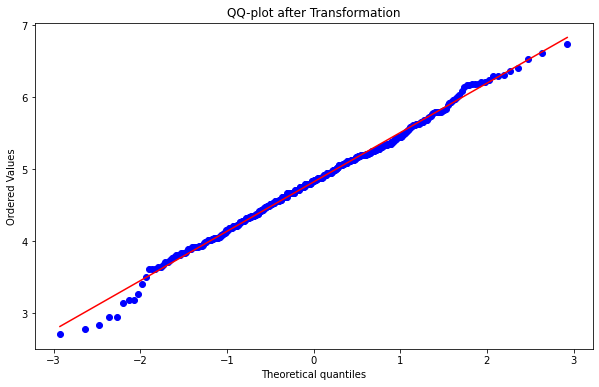

In [28]:
# g. Draw two QQ-plots to compare before and after the loge (x+1) transformation for Insulin column
plt.figure(figsize=(10, 6))
stats.probplot(df['Insulin'], plot=plt)
plt.title('QQ-plot before Transformation')
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(df_filtered['Insulin'], plot=plt)
plt.title('QQ-plot after Transformation')
plt.show()

In [29]:
# h. Similarly detect and correct outliers (step d) in the 'Glucose','BloodPressure' and'SkinThickness' columns
cols_to_correct = ['Glucose', 'BloodPressure', 'SkinThickness']
for col in cols_to_correct:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_band = Q1 - 1.5 * IQR
    upper_band = Q3 + 1.5 * IQR
    df_filtered.loc[df_filtered[col] < lower_band, col] = lower_band
    df_filtered.loc[df_filtered[col] > upper_band, col] = upper_band

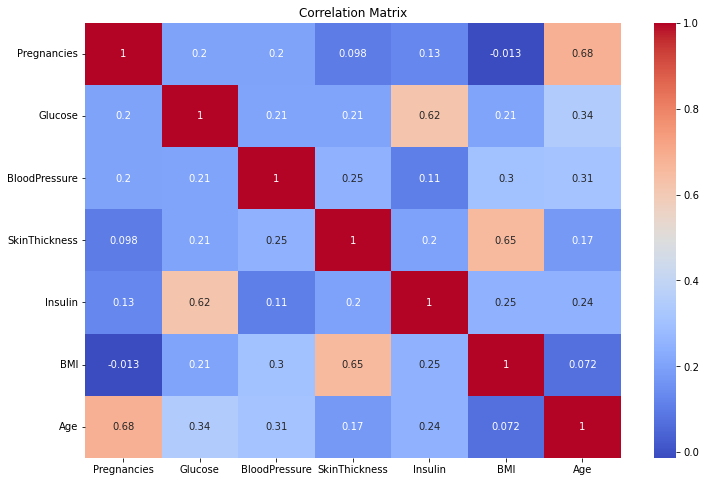

In [30]:
# i. Display the correlation matrix using the seaborn heatmap function between continuous variables
correlation_matrix = df_filtered[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Question 2: Data processing

In [31]:
# a. Group the patients by number of pregnancies, along with their average BloodPressure
grouped_bp = df_filtered.groupby('Pregnancies')['BloodPressure'].mean()
print(grouped_bp)

Pregnancies
0     73.263158
1     68.468085
2     66.107692
3     70.177778
4     70.458333
5     73.300000
6     67.052632
7     72.476190
8     78.285714
9     80.666667
10    81.600000
11    81.600000
12    74.400000
13    86.666667
14    78.000000
15    70.000000
17    72.000000
Name: BloodPressure, dtype: float64


In [32]:
# b. Group the patients by number of pregnancies, along with the average age, sum of all ages in that group, and the count of patients in that group
grouped_age = df_filtered.groupby('Pregnancies').agg({'Age': ['mean', 'sum', 'count']})
print(grouped_age)

                   Age            
                  mean   sum count
Pregnancies                       
0            24.258621  1407    58
1            27.122449  2658    98
2            25.194030  1688    67
3            28.244444  1271    45
4            30.407407   821    27
5            34.666667   728    21
6            38.368421   729    19
7            42.761905   898    21
8            44.714286   626    14
9            46.583333   559    12
10           48.000000   288     6
11           48.400000   242     5
12           46.800000   234     5
13           46.333333   139     3
14           46.000000    46     1
15           43.000000    43     1
17           47.000000    47     1


In [33]:
# c. Add a new column named ‘BMI/Age’ with the value of BMI over the Age
df_filtered['BMI/Age'] = df_filtered['BMI'] / df_filtered['Age']

In [34]:
# d. Add a new column named ‘risk
conditions = [
    (df_filtered['BMI'] > 45) & (df_filtered['BloodPressure'] > 100),
    (df_filtered['BMI'] > 30) & (df_filtered['BMI'] < 45) & (df_filtered['BloodPressure'] < 100),
    (df_filtered['BMI'] < 30)
]
choices = ['High', 'Medium', 'Low']
df_filtered['risk'] = np.select(conditions, choices, default='Unknown')

In [35]:
# e. Merge the two dataframes by the age
df_ages = pd.read_csv('ages.csv')
df_merged = df_filtered.merge(df_ages, on='Age', how='left')

In [36]:
# f. One-hot encode the categorical variable ‘AgeGroup’ and add the resulting columns to the dataframe
df_encoded = pd.get_dummies(df_merged, columns=['AgeGroup'])
print(df_encoded.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
0            1       89           66.0             23  4.553877  28.1   
1            0      137           40.0             35  5.129899  43.1   
2            3       78           50.0             32  4.488636  31.0   
3            2      197           70.0             45  6.298949  30.5   
4            1      189           60.0             23  6.741701  30.1   

   DiabetesPedigreeFunction  Age  Outcome   BMI/Age    risk  \
0                     0.167   21        0  1.338095     Low   
1                     2.288   15        1  2.873333  Medium   
2                     0.248   26        1  1.192308  Medium   
3                     0.158   53        1  0.575472  Medium   
4                     0.398   59        1  0.510169  Medium   

   AgeGroup_Adolescent  AgeGroup_Adult  AgeGroup_Senior  
0                    0               1                0  
1                    1               0                0  
2       